In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [244]:
plt.rc('font', family='Times New Roman')

In [245]:
def convert_times(df):
    time_nano = df.iloc[:,1]
    time_ms = time_nano / 1e+6
    time_s = time_ms / 1000
    time_min = time_s / 60

    df.insert(2, "time_ms", time_ms, True)
    df.insert(3, "time_s", time_s, True)
    df.insert(4, "time_min", time_min, True)

In [246]:
def calc_averages(df,N):
    nano_avg = np.average(df.iloc[:,1])
    ms_avg = np.average(df.iloc[:,2])
    s_avg = np.average(df.iloc[:,3])
    min_avg = np.average(df.iloc[:,4])

    top_1_training_avg = np.average(df.iloc[:,5])
    top_3_training_avg = np.average(df.iloc[:,6])
    top_5_training_avg = np.average(df.iloc[:,7])
    top_7_training_avg = np.average(df.iloc[:,8])

    top_1_test_avg = np.average(df.iloc[:,9])
    top_3_test_avg = np.average(df.iloc[:,10])
    top_5_test_avg = np.average(df.iloc[:,11])
    top_7_test_avg = np.average(df.iloc[:,12])

    stats_data = {'N':[N],'nano_avg':[nano_avg],'ms_avg':[ms_avg],'s_avg':[s_avg],'min_avg':[min_avg],'top_1_training_avg':[top_1_training_avg],'top_3_training_avg':[top_3_training_avg],'top_5_training_avg':[top_5_training_avg],'top_7_training_avg':[top_7_training_avg],'top_1_test_avg':[top_1_test_avg],'top_3_test_avg':[top_3_test_avg],'top_5_test_avg':[top_5_test_avg],'top_7_test_avg':[top_7_test_avg]}

    stats = pd.DataFrame(stats_data)

    return stats

In [247]:
def precision_latency_plots(stats, chosen_N):
    rows = stats.shape[0]
    X = stats.iloc[:,0]

    plt.figure(1,dpi=300)

    # chosen N
    min_precision = np.min(np.array([np.min(stats.iloc[:,5]),np.min(stats.iloc[:,6]),np.min(stats.iloc[:,7]),np.min(stats.iloc[:,8]),np.min(stats.iloc[:,9]),np.min(stats.iloc[:,10]),np.min(stats.iloc[:,11]),np.min(stats.iloc[:,12])])) - 0.025
    max_precision = np.max(np.array([np.max(stats.iloc[:,5]),np.max(stats.iloc[:,6]),np.max(stats.iloc[:,7]),np.max(stats.iloc[:,8]),np.max(stats.iloc[:,9]),np.max(stats.iloc[:,10]),np.max(stats.iloc[:,11]),np.max(stats.iloc[:,12])])) + 0.025

    plt.plot([chosen_N,chosen_N],[min_precision,max_precision],':',label='Optimal N value',color='#000000')

    # training precision
    plt.plot(X, stats.iloc[:,5], label = "Training: top-1 precision", color='#ff8083', ls='--')
    plt.plot(X, stats.iloc[:,6], label = "Training: top-3 precision", color='#d6060b', ls='--')
    plt.plot(X, stats.iloc[:,7], label = "Training: top-5 precision", color='#cc0006', ls='--')
    plt.plot(X, stats.iloc[:,8], label = "Training: top-7 precision", color='#a70508', ls='--')
    # test precision
    plt.plot(X, stats.iloc[:,9], label = "Test: top-1 precision", color='#0717ee')
    plt.plot(X, stats.iloc[:,10], label = "Test: top-3 precision", color='#0612be')
    plt.plot(X, stats.iloc[:,11], label = "Test: top-5 precision", color='#040e8f')
    plt.plot(X, stats.iloc[:,12], label = "Test: top-7 precision", color='#03095f')
    plt.title("Average top-k Precision of the Model on Training and Test Data")
    plt.ylabel("Precision")
    plt.xlabel("N")
    plt.grid(axis='y')
    plt.legend(bbox_to_anchor =(1.5, 1))
    plt.savefig('graphs/precision.png',dpi=300, bbox_inches='tight')
    plt.show()

    plt.figure(2,dpi=300)
    fig, ax = plt.subplots()
    ax.plot(X,stats.iloc[:,2],label='Avg. Latency per Recommendation')
    ax.plot(chosen_N,stats.iloc[:,2][chosen_N-2],'o',label='Optimal N value',color='#000000')
    plt.title("Average Latency per Recommendation")
    plt.ylabel("Time(ms)")
    plt.xlabel("N")
    plt.grid(axis='y')
    plt.legend()
    plt.savefig('graphs/latency.png',dpi=300)
    plt.show()


In [248]:
def creation_time_plots(creation_times, chosen_N):
    X = creation_times.iloc[:,0]
    X = range(2,np.max(X)+1)
    CT = creation_times.iloc[:,3]
    plt.figure(3,dpi=300)
    fig, ax = plt.subplots()
    ax.plot(X,CT,label='Duration of creating N-gram')
    ax.plot(chosen_N,CT[chosen_N-2],'o',label='Optimal N value',color='#000000')
    ax.set_yscale('log')
    ax.set_xticks(X)
    ax.set_yticks([     300,     540,  900,   1800,   3600,  7200,   14400,    28800])
    ax.set_yticklabels(['5min','9min','15min','30min','1h','2h','4h','8h'])
    plt.title("Duration of creating N-gram")
    plt.ylabel("Time")
    plt.xlabel("N")
    plt.grid(axis='y')
    plt.legend()
    plt.savefig('graphs/creation_times.png',dpi=300)
    plt.show()

In [249]:
def startup_time_plots(startup_times, chosen_N):
    X = startup_times.iloc[:,0]
    X = range(2,np.max(X)+1)
    CT = startup_times.iloc[:,3]
    plt.figure(4,dpi=300)
    fig, ax = plt.subplots()
    ax.plot(X,CT)
    ax.plot(chosen_N,CT[chosen_N-2],'o',label='Optimal N value',color='#000000')
    #ax.set_yscale('log')
    ax.set_xticks(X)
    #ax.set_yticks([     300,     540,  900,   1800,   3600,  7200,   14400,    28800])
    #ax.set_yticklabels(['5min','9min','15min','30min','1h','2h','4h','8h'])
    plt.title("Time taken to decompress the N-gram and load it into memory")
    plt.ylabel("Time(s)")
    plt.xlabel("N")
    plt.grid(axis='y')
    plt.legend()
    plt.savefig('graphs/start_up_times.png',dpi=300)
    plt.show()

In [250]:
def plots():
    # precision and latency
    data2 = pd.read_csv('precision_and_time/2.csv')
    data3 = pd.read_csv('precision_and_time/2.csv')
    data4 = pd.read_csv('precision_and_time/2.csv')
    data5 = pd.read_csv('precision_and_time/2.csv')
    data6 = pd.read_csv('precision_and_time/2.csv')
    data7 = pd.read_csv('precision_and_time/2.csv')
    data8 = pd.read_csv('precision_and_time/2.csv')
    data9 = pd.read_csv('precision_and_time/2.csv')
    data10 = pd.read_csv('precision_and_time/2.csv')
    data11 = pd.read_csv('precision_and_time/2.csv')
    data12 = pd.read_csv('precision_and_time/2.csv')
    data13 = pd.read_csv('precision_and_time/2.csv')
    data14 = pd.read_csv('precision_and_time/2.csv')
    data15 = pd.read_csv('precision_and_time/2.csv')

    convert_times(data2)
    convert_times(data3)
    convert_times(data4)
    convert_times(data5)
    convert_times(data6)
    convert_times(data7)
    convert_times(data8)
    convert_times(data9)
    convert_times(data10)
    convert_times(data11)
    convert_times(data12)
    convert_times(data13)
    convert_times(data14)
    convert_times(data15)

    stats2 = calc_averages(data2,2)
    stats3 = calc_averages(data3,3)
    stats4 = calc_averages(data4,4)
    stats5 = calc_averages(data5,5)
    stats6 = calc_averages(data6,6)
    stats7 = calc_averages(data7,7)
    stats8 = calc_averages(data8,8)
    stats9 = calc_averages(data9,9)
    stats10 = calc_averages(data10,10)
    stats11 = calc_averages(data11,11)
    stats12 = calc_averages(data12,12)
    stats13 = calc_averages(data13,13)
    stats14 = calc_averages(data14,14)
    stats15 = calc_averages(data15,15)

    stats = stats2
    stats = stats.append(stats3, ignore_index = True)
    stats = stats.append(stats4, ignore_index = True)
    stats = stats.append(stats5, ignore_index = True)
    stats = stats.append(stats6, ignore_index = True)
    stats = stats.append(stats7, ignore_index = True)
    stats = stats.append(stats8, ignore_index = True)
    stats = stats.append(stats9, ignore_index = True)
    stats = stats.append(stats10, ignore_index = True)
    stats = stats.append(stats11, ignore_index = True)
    stats = stats.append(stats12, ignore_index = True)
    stats = stats.append(stats13, ignore_index = True)
    stats = stats.append(stats14, ignore_index = True)
    stats = stats.append(stats15, ignore_index = True)

    precision_latency_plots(stats,7)

    # creation times
    creation_times = pd.read_csv('creation_times/creation_times.csv')
    convert_times(creation_times)

    creation_time_plots(creation_times,7)

    startup_times = pd.read_csv('creation_times/startup_times.csv')
    convert_times(startup_times)

    startup_time_plots(startup_times,7)

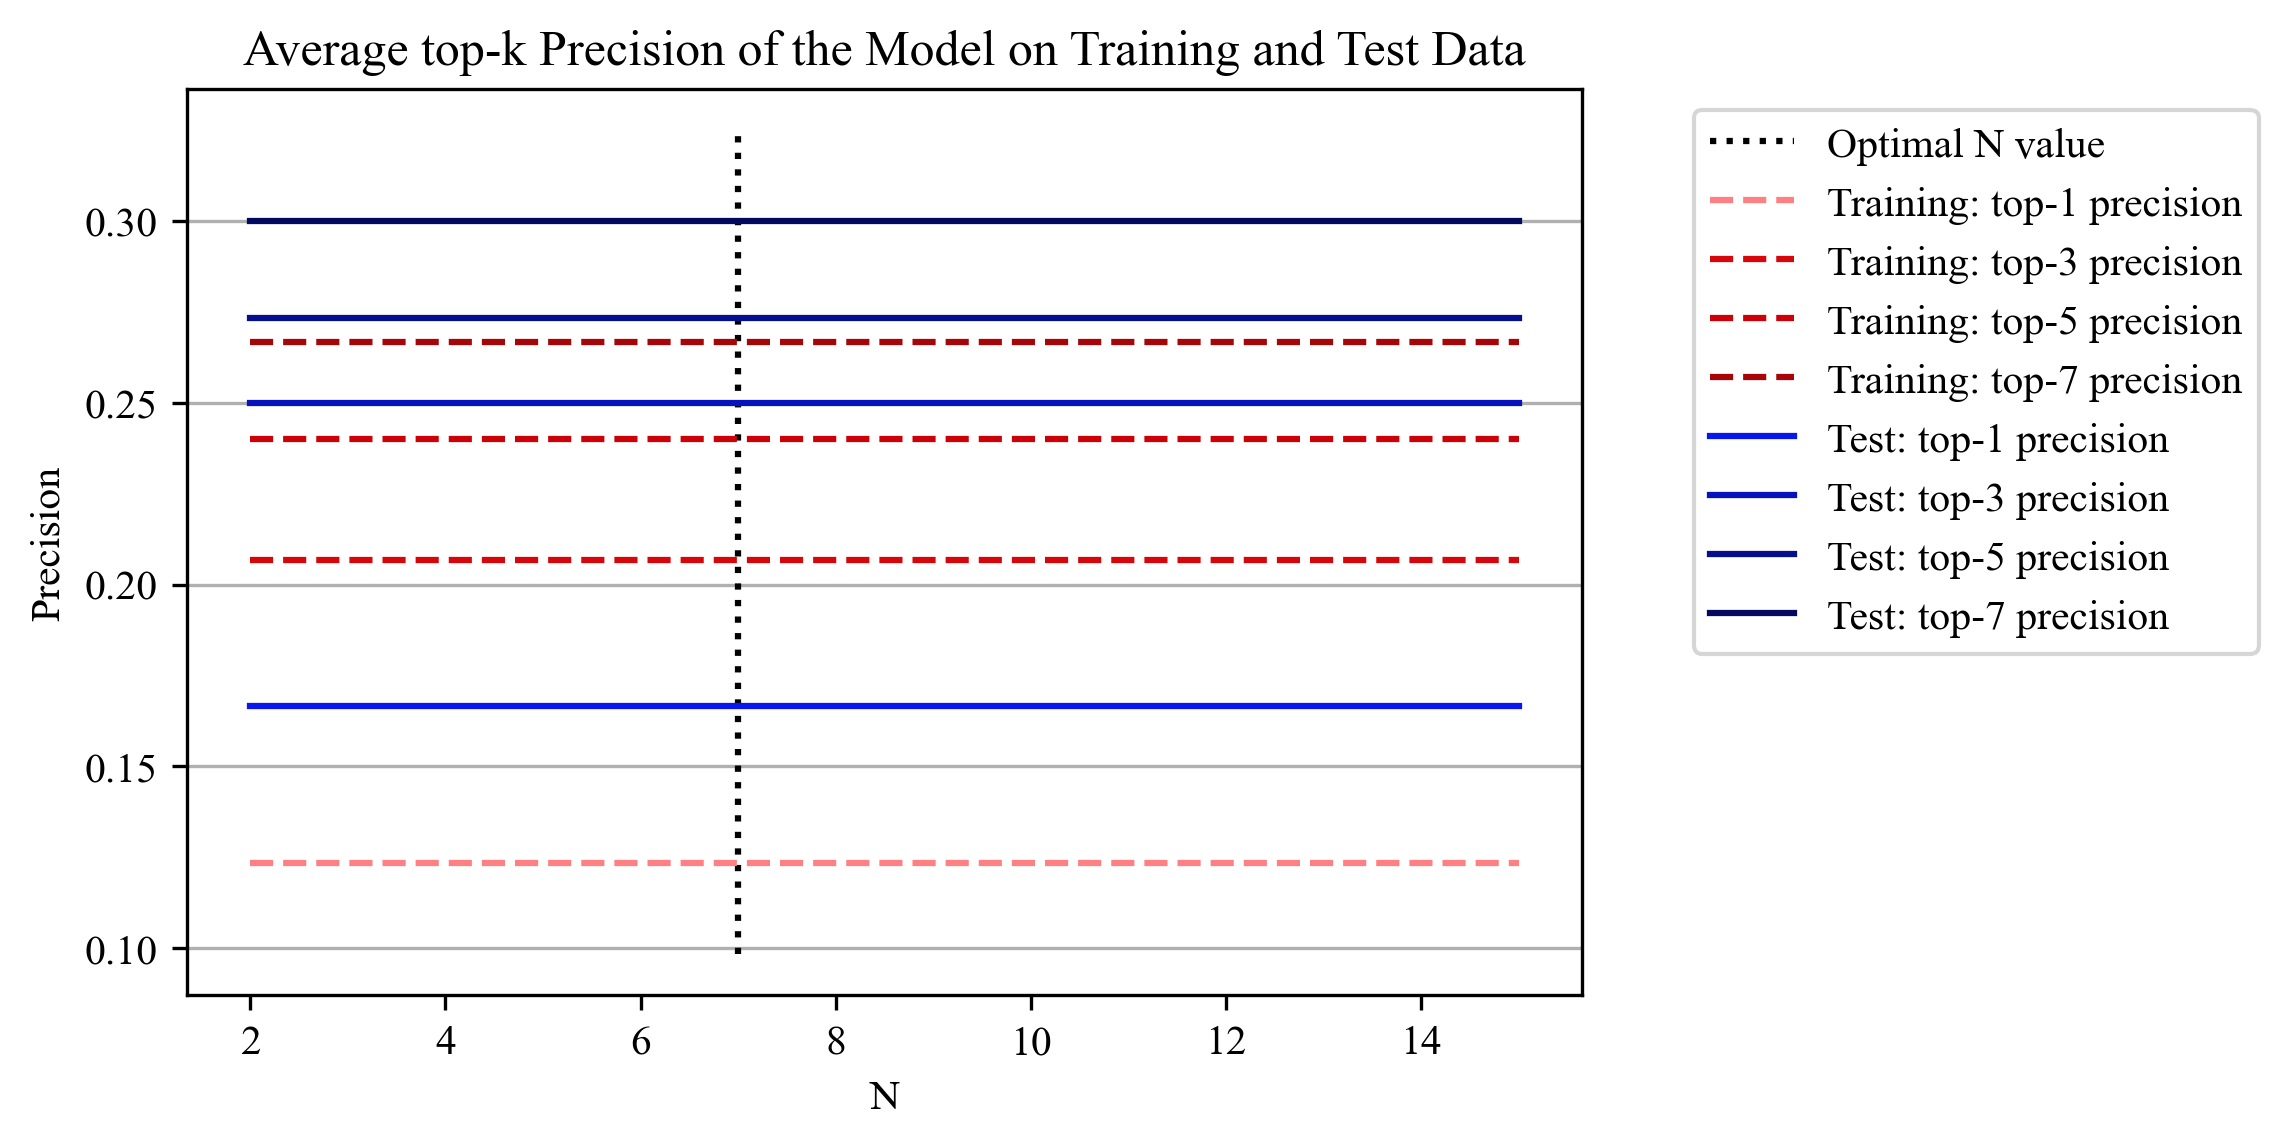

<Figure size 1800x1200 with 0 Axes>

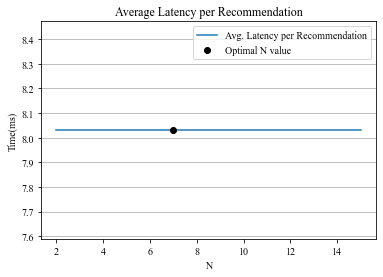

<Figure size 1800x1200 with 0 Axes>

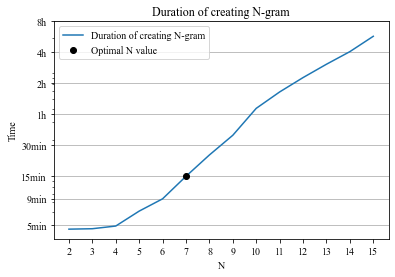

<Figure size 1800x1200 with 0 Axes>

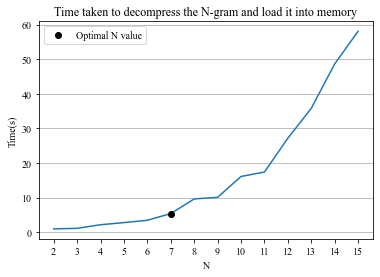

In [251]:
plots()